In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn 
%matplotlib inline

In [2]:
df = pd.read_csv("D:/python/practice/teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
region     1000 non-null int64
tenure     1000 non-null int64
age        1000 non-null int64
marital    1000 non-null int64
address    1000 non-null int64
income     1000 non-null float64
ed         1000 non-null int64
employ     1000 non-null int64
retire     1000 non-null float64
gender     1000 non-null int64
reside     1000 non-null int64
custcat    1000 non-null int64
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [4]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [9]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [10]:
pd.crosstab(df['region'], df['custcat'])

custcat,1,2,3,4
region,,,,
1,75,78,95,74
2,92,69,92,81
3,99,70,94,81


In [11]:
df.corr()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
region,1.000000,0.016388,0.015034,-0.080637,0.010320,0.023765,-0.057952,0.016335,0.005595,0.050596,-0.065158,-0.023771
tenure,0.016388,1.000000,0.490217,0.154171,0.522952,0.242912,-0.109797,0.520288,0.171143,0.023533,-0.036592,0.166691
age,0.015034,0.490217,1.000000,-0.014433,0.660435,0.327948,-0.154857,0.670047,0.429440,-0.011419,-0.254993,0.056909
marital,-0.080637,0.154171,-0.014433,1.000000,-0.012051,-0.043984,0.001400,-0.002891,-0.078109,0.008345,0.625999,0.083836
address,0.010320,0.522952,0.660435,-0.012051,1.000000,0.226781,-0.128330,0.463291,0.292503,0.008363,-0.201645,0.067913
income,0.023765,0.242912,0.327948,-0.043984,0.226781,1.000000,0.113939,0.516349,-0.083651,0.038706,-0.097591,0.134525
ed,-0.057952,-0.109797,-0.154857,0.001400,-0.128330,0.113939,1.000000,-0.228580,-0.114229,0.006704,0.021045,0.193864
employ,0.016335,0.520288,0.670047,-0.002891,0.463291,0.516349,-0.228580,1.000000,0.277401,0.046016,-0.134683,0.110011
retire,0.005595,0.171143,0.429440,-0.078109,0.292503,-0.083651,-0.114229,0.277401,1.000000,0.053906,-0.140120,0.008908
gender,0.050596,0.023533,-0.011419,0.008345,0.008363,0.038706,0.006704,0.046016,0.053906,1.000000,0.016556,-0.004966


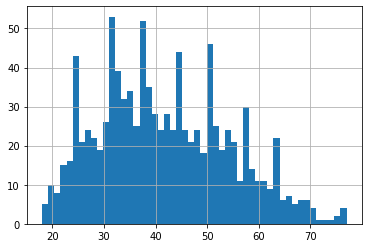

In [14]:
df['age'].hist(bins = 50)

In [57]:
X = np.array(df[["region","tenure","age","marital","address","income","ed","employ","retire","gender","reside"]])
#print(X)
print(X.shape)
print(X[0:5])
y = np.array(df["custcat"])
#print(y)
print(y.shape)

(1000, 11)
[[  2.  13.  44.   1.   9.  64.   4.   5.   0.   0.   2.]
 [  3.  11.  33.   1.   7. 136.   5.   5.   0.   0.   6.]
 [  3.  68.  52.   1.  24. 116.   1.  29.   0.   1.   2.]
 [  2.  33.  33.   0.  12.  33.   2.   0.   0.   1.   1.]
 [  2.  23.  30.   1.   9.  30.   1.   2.   0.   0.   4.]]
(1000,)


In [32]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
print(X[0:5])


[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.5941226  -0.22207644 -1.03459817  2.55666158]
 [ 1.19883553  1.52109247  0.82182601  1.0100505   1.23481934  0.35951747
  -1.36767088  1.78752803 -0.22207644  0.96655883 -0.23065004]
 [-0.02696767 -0.11831864 -0.69181243 -0.9900495   0.04453642 -0.41625141
  -0.54919639 -1.09029981 -0.22207644  0.96655883 -0.92747794]
 [-0.02696767 -0.58672182 -0.93080797  1.0100505  -0.25303431 -0.44429125
  -1.36767088 -0.89182893 -0.22207644 -1.03459817  1.16300577]]


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [47]:
k = 1
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
print(KNN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [48]:
y_predict = KNN.predict(X_test)


In [50]:
from sklearn import metrics
print("Accuracy score = ", metrics.accuracy_score(y_test,y_predict))

Accuracy score =  0.2733333333333333


In [53]:
n = 20
for i in range(1,n+1):
    KNN = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    y_predict = KNN.predict(X_test)
    print("Accuracy score = ", metrics.accuracy_score(y_test,y_predict))


Accuracy score =  0.2733333333333333
Accuracy score =  0.30666666666666664
Accuracy score =  0.31666666666666665
Accuracy score =  0.29333333333333333
Accuracy score =  0.35
Accuracy score =  0.36
Accuracy score =  0.32
Accuracy score =  0.3433333333333333
Accuracy score =  0.3333333333333333
Accuracy score =  0.3333333333333333
Accuracy score =  0.33666666666666667
Accuracy score =  0.32666666666666666
Accuracy score =  0.36
Accuracy score =  0.36333333333333334
Accuracy score =  0.36666666666666664
Accuracy score =  0.37
Accuracy score =  0.37
Accuracy score =  0.36333333333333334
Accuracy score =  0.36
Accuracy score =  0.36


In [63]:
#If drop age
X1 = np.array(df[["region","tenure","marital","address","income","ed","employ","retire","gender","reside"]])
#print(X)
print(X1.shape)
print(X1[0:5])
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.3, random_state = 1)

(1000, 10)
[[  2.  13.   1.   9.  64.   4.   5.   0.   0.   2.]
 [  3.  11.   1.   7. 136.   5.   5.   0.   0.   6.]
 [  3.  68.   1.  24. 116.   1.  29.   0.   1.   2.]
 [  2.  33.   0.  12.  33.   2.   0.   0.   1.   1.]
 [  2.  23.   1.   9.  30.   1.   2.   0.   0.   4.]]


In [67]:
n = 20
for i in range(1,n+1):
    KNN1 = KNeighborsClassifier(n_neighbors = i).fit(X1_train,y1_train)
    y1_predict = KNN1.predict(X1_test)
    print("Accuracy score = ", metrics.accuracy_score(y1_test,y1_predict))
    #沒有比較好

Accuracy score =  0.24666666666666667
Accuracy score =  0.31333333333333335
Accuracy score =  0.3233333333333333
Accuracy score =  0.3233333333333333
Accuracy score =  0.31666666666666665
Accuracy score =  0.33
Accuracy score =  0.35333333333333333
Accuracy score =  0.3433333333333333
Accuracy score =  0.33666666666666667
Accuracy score =  0.34
Accuracy score =  0.32666666666666666
Accuracy score =  0.34
Accuracy score =  0.34
Accuracy score =  0.35333333333333333
Accuracy score =  0.3333333333333333
Accuracy score =  0.3566666666666667
Accuracy score =  0.36333333333333334
Accuracy score =  0.3466666666666667
Accuracy score =  0.35
Accuracy score =  0.35333333333333333


In [73]:
n = 20
score_mean = np.zeros((n))
score_std = np.zeros((n))
for i in range(1,n+1):
    KNN = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    y_predict = KNN.predict(X_test)
    score_mean[i-1] = metrics.accuracy_score(y_test,y_predict)
    score_std[i-1] = np.std(y_predict == y_test)/np.sqrt(y_predict.shape[0])


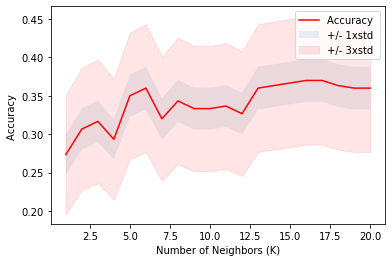

In [78]:
plt.plot(range(1,n+1),score_mean,'r')
plt.fill_between(range(1,n+1), score_mean - 1 * score_std, score_mean + 1 * score_std, alpha = 0.10)
plt.fill_between(range(1,n+1), score_mean - 3 * score_std, score_mean + 3 * score_std, alpha = 0.10, color = "red")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
#plt.tight_layout()
plt.show()

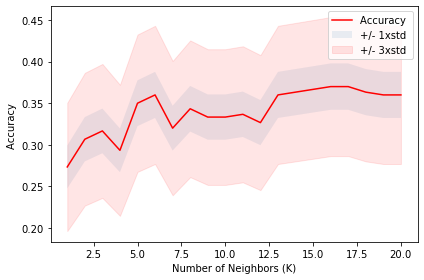

In [79]:
plt.plot(range(1,n+1),score_mean,'r')
plt.fill_between(range(1,n+1), score_mean - 1 * score_std, score_mean + 1 * score_std, alpha = 0.10)
plt.fill_between(range(1,n+1), score_mean - 3 * score_std, score_mean + 3 * score_std, alpha = 0.10, color = "red")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [82]:
print("The best accuracy rate = ", score_mean.max(), "with n = ", score_mean.argmax()+1)

The best accuracy rate =  0.37 with n =  16
